#**Salomon Uran Parra C.C. 1015068767**

#**Tarea 0 de Aprendizaje Estadístico: Dataset de pingüinos y Pandas**

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')

## **Primera aproximación a los datos de forma general y su limpieza:**

### **1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?**

La función unique() de pandas arroja una lista con los elementos que se repiten a lo largo de la columna seleccionada del dataframe 'species'. En este caso, al usar unique().tolist() se obtiene una lista con las únicas especies que se nombra en la columna.

In [ ]:
df['species'].unique().tolist()

Así, según el output anterior, las 3 especies de pingüinos presentes en el dataframe son Adelie, Chinstrap y Gentoo.

Además, las características dadas para los pingüinos en cada registro se pueden obtener al imprimir los nombres de las columnas del dataframe. Esto se hace con columns:

In [ ]:
df.columns.tolist()

Así, para cada pingüino, se está dando su especie, isla en donde fue observado, la longitud y profundidad del pico en mm (milímetros), longitud de la aleta en mm, masa del cuerpo en g (gramos) y sexo.

### **2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.**

Para saber si en el dataframe hay datos nulos o faltantes, se usa la función isnull(), que para cada dato del df arroja False si hay un dato no nulo y True en caso de que lo haya. Luego se puede emplear any() o sum() para saber si para cada columna hay datos nulos o cuantos de estos hay:

In [ ]:
display(df.isnull().any())
display(df.isnull().sum())

Una vez que sabemos que hay datos nulos, se puede emplear distintas estrategias de limpieza. Por ejemplo, podríamos reemplazar cada dato nulo por un remuestreo del resto de datos presentes en el dataframe (bootstrap). Sin embargo, en este caso, debido a la poca cantidad de registros con datos faltantes (11 registros) en comparación con el total de registros del df (344), se puede optar por eliminar los registros que posean información faltante.

In [ ]:
#Este es el numero de registros que hay en el dataframe originalmente
print('Hay un total de',df.shape[0], 'registros en el dataframe')

display(df)

La función drop(index, inplace) permite eliminar la fila con índice index del dataframe. Si inplace = True, drop() modifica directamente el dataframe en donde está siendo aplicado. Si inplace = False, se crea una copia modifica del dataframe.

In [ ]:
cond = df.isnull().any(axis=1)
#condicion que arroja true para los registros con datos nulos y false para los que tienen datos buenos

l = df[cond].index.tolist()
#lista de indices de los registros con datos nulos

for i in range(0,len(l)):
  df.drop(l[i],inplace=True)
  #funcion que elimina la fila con indice l[i] del dataframe

df.reset_index(drop = True, inplace = True)
#esta funcion permite reposicionar los indices de los registros nuevamente en orden numerico desde 0

df

Ahora, isnull() no debería arrojar ningún registro que posea valores nulos, pues el dataframe se limpió anteriormente

In [ ]:
df.isnull().any()

### **3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?**

Al seleccionar la columna 'island', la función value_counts() arroja el conteo de registros para cada tipo de isla.

In [ ]:
df['island'].value_counts()

Así, podemos ver que Biscoe es la isla con mayor observación de pingüinos con 163, seguido por Dream con 123 y Torgersen con 47. El desbalance se puede hacer comparativamente con el total de registros que son 333.

In [ ]:
total = df.shape[0]
#me da las dimensiones del dataframe en la forma (x,y) donde el primer argumento es el numero de filas

biscoe = 163
dream = 123
torgersen = 47
print(f'Los pinguinos en la isla Biscoe representan un {biscoe/total*100:.2f}% del total de pinguinos registrados')
print(f'Los pinguinos en la isla Dream representan un {dream/total*100:.2f}% del total de pinguinos registrados')
print(f'Los pinguinos en la isla Torgersen representan un {torgersen/total*100:.2f}% del total de pinguinos registrados')

Estos porcentajes muestran claramente que hay presente un desbalance de la cantidad de pingüinos provenientes de cada isla. La explicación a ello podría deberse a que en la isla Biscoe hay mejor hábitat o históricamente ha habido mayores poblaciones de pingüinos, lo que podría hacer más propensa la aparición y facilitar la toma de datos de los especímenes. También puede ser debido a la forma en la que se tomaron los registros, pudiendo haber dedicado más tiempo a la toma de datos en la isla Biscoe y Dream que en Torgersen.

### **4. Repita la pregunta anterior observando las especies.**

Nuevamente haciendo uso de .value_counts() al seleccionar la columna 'species', obtenemos el conteo de registros para cada tipo de especie.

In [ ]:
df['species'].value_counts()

Aquí nuevamente se ve que hay una especie que predomina en los registros. Adelie tiene 146 conteos, Gentoo 119 y Chinstrap 68. Al comparar porcentualmente con el total de registros se obtiene lo siguiente

In [ ]:
total = df.shape[0]
adelie = 146
gentoo = 119
chinstrap = 68
print(f'Los pinguinos de la especie Adelie representan un {adelie/total*100:.2f}% del total de pinguinos registrados')
print(f'Los pinguinos de la especie Gentoo representan un {gentoo/total*100:.2f}% del total de pinguinos registrados')
print(f'Los pinguinos de la especie Chinstrap representan un {chinstrap/total*100:.2f}% del total de pinguinos registrados')

Y nuevamente, estos porcentajes muestran una desproporción entre las especies de los pingüinos en los registros. Seguramente la mayor presencia de Adelie y Gentoo se pueda explicar de varias formas. Una selección muy específica y sesgada de las islas donde se pueden encontrar (tal vez haya más presencia de Chinstrap en otras islas no registradas); también puede ser debido a una mejor evolución de las especies Adelie y Gentoo que garantiza una mayor supervivencia y reproducibilidad en los hábitats de las islas donde se encuentran.

## **Tendencias y visualizacion de las variables**

### **5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?**

La función groupby permite agrupar el dataframe por los datos de una columna. En este caso se agrupa por 'species'. Para cada especie se selecciona la longitud del pico y por medio de la función agg(), que calcula sobre la serie las funciones entregadas en la lista, se imprimen series con las medias y desviaciones de la longitud del pico para cada una de las especies:

In [ ]:
display(df.groupby('species')['bill_length_mm'].agg(['mean','std']))

### **6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?**

La función max() permite hallar el valor máximo de una columna del dataframe. Al usar == se puede crear una serie booleana que tiene valores True en las posiciones de los registros que coinciden con la condición.

In [ ]:
#se obtiene el maximo valor de longitud del pico del pinguino
pico_mas_largo = df['bill_length_mm'].max()

#se selecciona las filas (o la fila) que coincide con el valor del pico mas largo
pinguino_pico_largo = df[df['bill_length_mm'] == pico_mas_largo]


display(pinguino_pico_largo)

El pingüino con el pico más largo está en el registro 246 después de la limpieza de datos y pertenece a la especie Gentoo

### **7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?**

Por medio de la librería Seaborn, es posible hacer graficas bonitas de histogramas para los datos del dataframe. data recibe directamente el dataframe como input, x recibe la columna del dataframe sobre la cual deseas hacer el histograma, hue permite hacer algo similar a groupby, en donde agrupa los elementos del dataframe por los valores de la columna que le entregas, y kde es la abreviatura para Kernel Density Estimation, el cual es un método estadístico no paramétrico para estimar la distribución de probabilidad de una variable aleatoria (en este caso el histograma).

In [ ]:
sns.histplot(data=df, x='body_mass_g', hue='species', kde=True, alpha = 0.3)
plt.title('Distribucion de la masa corporal por especie')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

Los histogramas y densidades estimadas anteriores muestran cómo se distribuye aproximadamente la masa del pingüino para cada una de las especies. Se puede observar que Adelie y Chinstrap poseen casi la misma forma de la distribución a excepción de la ocurrencia o frecuencia, mientras que Gentoo tiene una media más alta y una mayor desviación estándar (ancho de la curva) que las otras dos especies. Estas diferencias se pueden atribuir a características inherentes de cada especie o diferencias en los hábitats, como alimentos, clima, etc.

### **8. Describa la distribucion con ayuda de la media, desviacion estandard**

Al agrupar el dataframe usando groupby por especies y seleccionar la columna de masa corporal, la función describe() arroja múltiples datos estadísticos que incluyen la media y desviación estándar de la masa corporal para las distintas especies de pingüinos:

In [ ]:
df.groupby('species')['body_mass_g'].describe()

De esta tabla se puede observar lo siguiente para las especies de pingüinos, utilizando la desigualdad de Chebyshev bajo las suposiciones necesarias para emplearla (media y varianzas finitas no nulas, y los datos una variable aleatoria integrable):

*   La especie Adelie tiene una masa corporal promedio de $\mu$ = 3706 g con una desviación estándar $\sigma$ = 458 g. Esto nos dice que como mínimo, un 75% de las masas corporales de los pingüinos están en el intervalo ($\mu -2\sigma, \mu + 2\sigma$) = (2790,4622) g. Es decir, los pesos comúnmente oscilan entre casi 3 kg y poco más de 4.5 kg, a falta de conocer más información sobre la distribución estadística propia de los pesos de la especie Adelie.
*   La especie Chinstrap tiene una masa corporal promedio de $\mu$ = 3733 g con una desviación estándar $\sigma$ = 384 g. De manera análoga que como se hizo con Adelie, como mínimo, el 75% de las masas corporales de la especie Chinstrap están en el intervalo ($\mu -2\sigma, \mu + 2\sigma$) = (2965,4501) g.
*   La especie Gentoo tiene una masa corporal promedio de $\mu$ = 5092 g con una desviación estándar $\sigma$ = 501 g. Usando Chebyshev, como mínimo, el 75% de las masas corporales de la especie Gentoo está en el intervalo ($\mu -2\sigma, \mu + 2\sigma$) = (4090,6094) g. Esto indica que comúnmente los pesos de los Gentoo oscilan entre 4 kg y 6 kg, bastante más que las otras dos especies (son más pesados).


### **9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?**

Empleando groupby() por sexo y escogiendo la masa corporal, describe() arrojara los datos de media y desviación estándar para ambos sexos:

In [ ]:
df.groupby('sex')['body_mass_g'].describe()

Así, podemos ver que los pingüinos machos tienen una masa corporal promedio alrededor de 4545 g con una desviación estándar alrededor de 787 g. Las hembras tienen un promedio menor alrededor de 3862 g con desviación de 666 g, lo que indica que comúnmente los machos son más de medio kg más pesados que las hembras.

### **10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?**

Nuevamente agrupando por especies y eligiendo la columna de la longitud de la aleta, se obtiene la media y desviación:

In [ ]:
df.groupby('species')['flipper_length_mm'].describe()

Así, para Adelie se obtuvo una media de longitud de la aleta de alrededor de 190 mm con una desviación estándar cercana a los 6.5 mm. Para Chinstrap, la longitud media es de alrededor de 195 mm con desviación cercana a los 7 mm, mientras que para los Gentoo la media está cerca de 217 mm con desviación aproximada de 6.5 mm.

### **11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?**

Con la función agg(), al haber agrupado por especies y seleccionado la columna de las altes, se puede obtener simultáneamente el mínimo y máximo valor de la longitud para cada una de las especies.

In [ ]:
display(df.groupby('species')['flipper_length_mm'].agg(['min','max']))

Así, podemos observar que la longitud mínima y máxima de la aleta para los Adelie es de 172 y 210 mm respectivamente; para los Chinstrap el mínimo es de 178 mm y el máximo de 212 mm, datos bastante similares a los de Adelie. Gentoo si tiene una diferencia mayor, con un mínimo de 203 mm y un máximo de 231 mm, lo que indica que son pingüinos bastante más grandes y está en concordancia con los datos de la distribución de la masa corporal por especie de los pingüinos, el cual también indicaba un mayor peso para los Gentoo.

### **12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?**

Utilizando la librería Seaborn, se pueden graficar los histogramas de las frecuencias de los datos de longitud de pico para cada especie en cada isla que aparece. Como la especie Adelie tiene registros en las 3 islas del dataframe, se prefiere usar diagramas de caja o boxplots para poder comparar de mejor forma la información de los histogramas entre islas. Para entender el diagrama de caja hay que tener presente que la caja central representa el 50% de los datos centrales, es decir los datos entre los percentiles 25 y 75 de los datos. La línea dentro de esta representa el percentil 50 o la mediana de los datos. Las líneas por fuera de la caja, llamados bigotes, delimitan el rango de los datos contenidos en 1.5 veces el tamaño de la caja, también conocido como el rango intercuartílico. Los datos que quedan por fuera de este intervalo se toman como atípicos y se notan con puntos por fuera de los bigotes.

In [ ]:
fig, ax1 = plt.subplots(1,3,figsize=(15,5))

especies = df['species'].unique()
#me da una serie con los strings de los nombres de las especies

for i in range(0,3):
  ax1[i].grid()
  sns.boxplot(data = df[df['species'] == especies[i]], y = 'bill_length_mm', x = 'island', ax = ax1[i], hue='island')
  #grafica el diagrama de caja de la respectiva especie en la posicion i de la serie anteriormente definida
  if i == 1:
    ax1[i].set_title('Distribución de la longitud del pico de cada pinguino por especie e isla')
  ax1[i].set_xlabel(f'Isla')
  ax1[i].set_ylabel(f'Longitud del pico de la especie {especies[i]} (mm)')

plt.tight_layout()
plt.show()

Para complementar estos gráficos podemos mostrar las medias y desviaciones estándar de las longitudes de los picos por especie e isla:

In [ ]:
df.groupby(['species','island'])['bill_length_mm'].describe()

Así, podemos ver cómo se distribuyen las longitudes del pico por especie e isla. Para los Chinstrap, la única isla en la que aparecen es en Dream, y allí tienen una longitud media de 48.8 mm con desviación de 3.3 mm; esto se puede observar en el segundo grafico donde el diagrama de caja muestra que el 50% de los datos de longitudes están aproximadamente entre 46 y 51 mm, que concuerda con los datos de media y desviación estándar que se podrían analizar usando la desigualdad de Chebyshev.

Para los Gentoo, la única isla donde se registraron es en Biscoe, allí la longitud media del pico es de 47.5 mm con desviación de 3.1 mm; en la tercera gráfica, el diagrama de caja muestra que el 50% de los datos de longitudes están aproximadamente entre 45 y 50 mm, lo que nuevamente es coherente con la media y desviación.

En el caso de los Adelie, estos tienen registros en las tres islas. La media de la longitud para las tres islas oscila entre 38.5 y 39.0 mm y las desviaciones entre 2.48 y 3.02 mm. Al observar en la primera gráfica, los diagramas de cajas muestran que el 50% de los datos de longitud para cada una de las islas oscila aproximadamente entre 37 y 41 mm, que es consistente con las medias y desviaciones reportadas y que puede ser analizado más a profundidad con la desigualdad de Chebyshev. Sin embargo, los bigotes dan una información adicional; los datos atípicos de la isla Biscoe y la diferencia de rangos entre las tres islas se puede observar claramente. Explicar el origen de estas diferencias puede ser una tarea ardua pues puede deberse a factores ambientales, genéticos y de la forma de la toma de registros en cada una de las islas.


### **13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?**

Haciendo uso de groupby(), describe() y max() se puede obtener la isla y la especie con la mayor variación del pico:

In [ ]:
dfd = df.groupby(['species','island'])['bill_length_mm'].describe()['std']
#se agrupa por especie e isla, se selecciona la longitud del pico, se usa describe() y se extraen las desviaciones estandar
display(dfd)

maximo = dfd.max()
#se obtiene el maximo valor

isla_maximo = dfd[dfd == maximo]
#se obtiene el registro con la maxima desviacion estandar en la longitud del pico


display(f"La isla con la mayor variación en la longitud del pico (medida por la desviación estándar) es:")
display(isla_maximo)

## **Relación entre caracteristicas de los pingüinos**

### **14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.**

La función scatterplot() de seaborn permite graficar diagramas de dispersión entregándole la data (el dataframe) y la coordenada en x e y (las columnas de los datos a graficar), así pues, la relación entre la longitud del pico y la masa corporal de los pingüinos se puede visualizar de la siguiente forma:

In [ ]:
sns.scatterplot(data = df, x = 'bill_length_mm', y = 'body_mass_g')
plt.title('Relación entre longitud del pico y masa corporal de los pinguinos')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

Usando la opción adicional hue, se puede agrupar la data por especies, para obtener el diagrama de dispersión distinguiendo por especies de pingüinos:

In [ ]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Relación entre longitud del pico y masa corporal por especie')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()

Así, podemos ver que la longitud del pico y masa corporal en general tiende a relacionarse positivamente, es decir, se ve un comportamiento creciente de la masa corporal a medida que la longitud del pico es más grande (también podría verse al revés). Vemos que esta relación por especie es mucho más notoria para los Adelie y Gentoo, que parecen incluso relacionar 'linealmente' la longitud y la masa corporal. Los Chinstrap también parecen tener un comportamiento 'lineal' pero distinto al de las otras dos especies.

### **15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?**

Pandas también posee funciones que sacan otros parámetros estadísticos, por ejemplo corr() arroja la correlación de una columna con respecto a otra, de la siguiente forma:

In [ ]:
#se calcula el coeficiente de correlacion
cr = df['bill_length_mm'].corr(df['body_mass_g'])

print(f"El coeficiente de correlación entre la longitud del pico y la masa corporal es: {cr:.2f}")

Al hacer uso de los condicionales, se puede sacar la correlación entre la longitud del pico y la masa corporal para cada una de las especies de pingüinos:

In [ ]:
sp = df['species'].unique()
#se obtiene una lista con las distintas especies

for i in sp:
  ndf = df[df['species'] == i]
  #se seleccionan los datos del df que cumplen ser de una especie especifica

  cr = ndf['bill_length_mm'].corr(ndf['body_mass_g'])
  #se saca la correlacion

  print(i,f'{cr:.2f}')

De la primera celda podemos observar que los datos de los pingüinos tienen una correlación positiva entre la longitud del pico y la masa corporal de $r = 0.59$, lo que indica que a medida que un pingüino tiene una mayor longitud de pico, tiende a tener una mayor masa corporal.

Ahora, por especie, la correlación entre longitud de pico y masa corporal dio lo siguiente: para Adelie da $r = 0.54$, para Chinstrap da $r = 0.51$ y para Gentoo da $r = 0.67$. Estos valores indican que para las tres especies hay una relación positiva, que implica nuevamente que a mayor longitud mayor masa corporal de cada uno de los pingüinos. Un mayor coeficiente de correlación para una especie que para otras puede indicar una mayor dependencia de la longitud del pico con respecto al peso. Esto podría dar lugar a estudiar cualidades físicas de cada especie y las diferencias entre especies.


### **16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?**

En este caso haremos uso de los diagramas de violín (combinación de diagrama de caja y kde) para plotear la diferencia entre los sexos para la longitud de la aleta por cada una de las especies:

In [ ]:
fig, ax1 = plt.subplots(1,3,figsize=(15,5))

especies = df['species'].unique()
#me da una serie con los strings de los nombres de las especies

sex_palette = {'Male':'blue','Female':'red'}

for i in range(0,3):
  ax1[i].grid()
  sns.violinplot(data = df[df['species'] == especies[i]], y = 'flipper_length_mm', x = 'sex', ax = ax1[i], hue='sex',palette = sex_palette)
  #grafica el diagrama de violin de la respectiva especie en la posicion i de la serie anteriormente definida
  if i == 1:
    ax1[i].set_title('Distribución de la longitud del pico de cada pinguino por especie y sexo')
  ax1[i].set_xlabel(f'Isla')
  ax1[i].set_ylabel(f'Longitud del pico de la especie {especies[i]} (mm)')

plt.tight_layout()
plt.show()

Aquí podemos observar que la tendencia siempre es que los machos tienen un pico más largo que las hembras. En el caso de los Chinstrap y Gentoo la distribución de los machos y hembras es más ancha para las longitudes, pero sigue el mismo comportamiento, mientras que para los Adelie parece que los machos y hembras tienen intervalos 'más definidos', ósea son distribuciones menos anchas. También podemos comparar un poco los datos entre machos o hembras de las tres especies. Por ejemplo, los machos de Gentoo tienen longitudes muchísimo más grandes que los Chinstrap y Adelie, igualmente para las hembras. Entre machos de los Chinstrap y Adelie, los Chinstrap tienen más cantidad de datos atípicos que los Adelie, sobre todo para longitudes más largas, lo que puede implicar ciertas características distintas para los machos de ambas especies. En el caso de las hembras, parece que los Adelie no tienen tanta variación de la longitud y que los Chinstrap también tienden a tener longitudes más largas del pico.

### **17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.**


Una posible relación entre dos variables del dataframe que no se exploró a lo largo de los puntos es la longitud del pico versus la profundidad del pico. Haciendo uso de los diagramas de dispersión se puede ver cómo se distribuyen los datos de longitud respecto a los de profundidad para cada una de las especies.

In [ ]:
sns.scatterplot(data = df, x = 'bill_length_mm', y = 'bill_depth_mm',hue = 'species')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profunidad del pico (mm)')
plt.show()

Podemos ver visualmente que debe haber cierto nivel de correlación entre la longitud y profundidad para cada una de las especies. Vamos a calcular el coeficiente de correlación para cada una de las especies:

In [ ]:
sp = df['species'].unique()
#se obtiene una lista con las distintas especies


sp1 = df[df['species'] == sp[0]]
#se seleccionan los datos del df que cumplen ser de una especie especifica
cr1 = sp1['bill_length_mm'].corr(sp1['bill_depth_mm'])
#se saca la correlacion entre longitud y profundidad del pico

sp2 = df[df['species'] == sp[1]]
#se seleccionan los datos del df que cumplen ser de una especie especifica
cr2 = sp2['bill_length_mm'].corr(sp2['bill_depth_mm'])
#se saca la correlacion entre longitud y profundidad del pico

sp3 = df[df['species'] == sp[2]]
#se seleccionan los datos del df que cumplen ser de una especie especifica
cr3 = sp3['bill_length_mm'].corr(sp3['bill_depth_mm'])
#se saca la correlacion entre longitud y profundidad del pico

print(sp[0],cr1)
print(sp[1],cr2)
print(sp[2],cr3)

Con el coeficiente de correlación para cada una de las especies, podemos plantear el siguiente test de hipótesis para verificar estadísticamente si la correlación $\rho$ entre longitud y profundidad puede ser debido a la aleatoriedad.

La hipótesis nula será:

$$H_0: \rho = 0$$

Y la alternativa será:

$$H_A: \rho \neq 0$$

Como anteriormente calculamos el estimador sesgado del coeficiente de correlación, $r$, para cada una de las especies, podemos evaluar el test de hipótesis usando lo siguiente. Si el parámetro $\rho = 0$ es la condición que deseamos evaluar, el estimador $r$ sigue una distribución t-student con $n-2$ grados de libertad, donde $n$ es el número de datos de la muestra:

$$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

Dado un nivel de significancia $\alpha = 0.05$, el test evaluara si el estadígrafo de t-student asociado al estimador $r$ de $\rho = 0$ es mayor que el percentil de la distribución para dicho nivel. En el texto de Marques de Cantu se puede encontrar en la tabla A-5 dichos percentiles para una prueba de dos colas y varios grados de libertad para la t-student. En este caso el percentil sera $1-\alpha/2 = 0.975$.

Ahora vamos a sacar los grados de libertad de los datos de cada especie. Los dataframe sp1, sp2 y sp3 corresponden a las especies Adelie, Chinstrap y Gentoo respectivamente.

In [ ]:
n1 = sp1.shape[0]
n2 = sp2.shape[0]
n3 = sp3.shape[0]

gl1 = n1-2
gl2 = n2-2
gl3 = n3-2

print(sp[0],gl1)
print(sp[1],gl2)
print(sp[2],gl3)

Ahora con los grados de libertad podemos hacer uso de la tabla A-5.


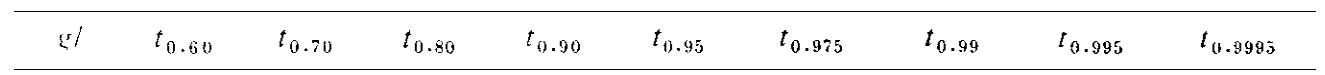

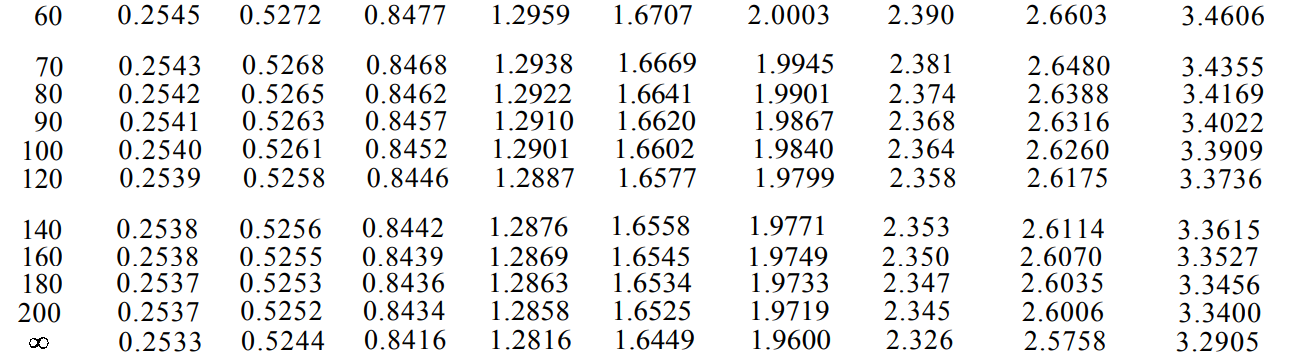

Vemos que los grados de libertad para las especies no están explícitos en dicha tabla, sin embargo, podemos aproximarlo de la siguiente forma. Para Adelie, podemos aproximar los grados de libertad de 144 a 140. Para Chinstrap de 66 a 70, y para Gentoo de 117 a 120. Así, para Adelie el percentil de t-student es $t_{0.975} = 1.9771$, para Chinstrap $t_{0.975} = 1.9945$, y para Gentoo $t_{0.975} = 1.9799$.

Ahora haciendo uso de la fórmula para $t$ vamos a calcular el estadígrafo para cada especie y comparar con el percentil. Si el estadígrafo es mayor que el percentil, significa que el estimador $r$ esta por fuera del intervalo definido por el nivel de significancia $\alpha$ tal que se pueda asumir que la aleatoriedad explica la diferencia entre $r$ y $\rho = 0$.


In [ ]:
#para Adelie

t_adelie = cr1 * np.sqrt(gl1)/np.sqrt(1-cr1**2)
print('Adelie. Estadigrafo t:',t_adelie,' Percentil', 1.9771)

#para Chinstrap
t_chinstrap = cr2 * np.sqrt(gl2)/np.sqrt(1-cr2**2)
print('Chinstrap. Estadigrafo t:',t_chinstrap,' Percentil', 1.9945)

#para Gentoo
t_gentoo = cr3 * np.sqrt(gl3)/np.sqrt(1-cr3**2)
print('Gentoo. Estadigrafo t:',t_gentoo,' Percentil', 1.9799)

Podemos ver que, para las 3 especies, el estadígrafo t es mayor que el valor definido por el percentil para $\alpha = 0.05$. Así, con un nivel de significancia del 5%, podemos rechazar la hipótesis nula. Es decir, estadísticamente no hay nada que nos indique que la correlación entre la longitud y profundidad del pico, para cada una de las especies de pingüinos, pueda ser debida simplemente a la aleatoriedad. De esto podemos concluir que debe haber física (o biológicamente) una explicación o descripción que dé cabida a una relación positiva entre la longitud y profundidad, de tal manera que cuando haya mayor longitud del pico, este también tienda a ser más profundo, para todas las especies.